In [17]:
#import libraries
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
warnings.filterwarnings("ignore")

In [18]:
#set working directory
working_directory = "C:/Users/ADMIN/Documents/Agriculture Project"
os.chdir = working_directory

In [19]:
#load dataset 
df = pd.read_csv("C:/Users/ADMIN/Documents/Agriculture Project/city_temperature.csv")
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [20]:
#Checking if all the cities has the data for a full range
df['City'].value_counts()

City
Springfield      18530
Columbus         18530
Portland         18530
Washington DC    18530
Washington       18530
                 ...  
Frankfurt         4136
Flagstaff         3574
Pristina          3427
Yerevan           3226
Bonn              3133
Name: count, Length: 321, dtype: int64

In [21]:
#time series for a random city 
chennai = df[df["City"] == "Chennai (Madras)"]
chennai.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
331055,Asia,India,NaN,Chennai (Madras),1,1,1995,72.4
331056,Asia,India,NaN,Chennai (Madras),1,2,1995,73.5
331057,Asia,India,NaN,Chennai (Madras),1,3,1995,72.6
331058,Asia,India,NaN,Chennai (Madras),1,4,1995,75.2
331059,Asia,India,NaN,Chennai (Madras),1,5,1995,74.8


In [22]:
#do any missing values for the years
chennai["Year"].value_counts()

Year
2008    366
2000    366
2016    366
2015    366
2004    366
2012    366
1996    366
2010    365
2019    365
2018    365
2017    365
2014    365
2013    365
2011    365
1995    365
2009    365
2007    365
2006    365
2005    365
2003    365
2002    365
2001    365
1999    365
1998    365
1997    365
2020    134
Name: count, dtype: int64

In [23]:
#fill
chennai["AvgTemperature"] = np.where(chennai["AvgTemperature"] == -99, np.nan, chennai["AvgTemperature"])
chennai.isnull().sum()


Region               0
Country              0
State             9266
City                 0
Month                0
Day                  0
Year                 0
AvgTemperature      29
dtype: int64

In [24]:
#check for null after filling
chennai["AvgTemperature"] = chennai["AvgTemperature"].ffill()
chennai.isnull().sum()

Region               0
Country              0
State             9266
City                 0
Month                0
Day                  0
Year                 0
AvgTemperature       0
dtype: int64

In [25]:
#create date column
chennai.dtypes
chennai["Time_steps"] = pd.to_datetime((chennai.Year*10000 + chennai.Month*100 + chennai.Day).apply(str),format='%Y%m%d')
chennai.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Time_steps
331055,Asia,India,NaN,Chennai (Madras),1,1,1995,72.4,1995-01-01
331056,Asia,India,NaN,Chennai (Madras),1,2,1995,73.5,1995-01-02
331057,Asia,India,NaN,Chennai (Madras),1,3,1995,72.6,1995-01-03
331058,Asia,India,NaN,Chennai (Madras),1,4,1995,75.2,1995-01-04
331059,Asia,India,NaN,Chennai (Madras),1,5,1995,74.8,1995-01-05


In [26]:
def plot_series(time, series, format="-", start=0, end=None):
    """to plot the series"""
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Year")
    plt.ylabel("Temprature")
    plt.grid(True)

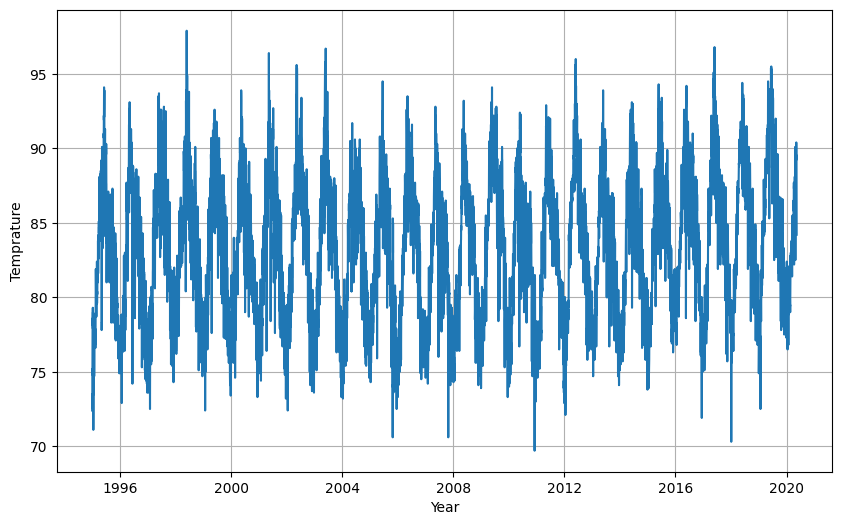

In [27]:
#time series for the entire time
time_step = chennai["Time_steps"].tolist()
temprature = chennai["AvgTemperature"].tolist()

series = np.array(temprature)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

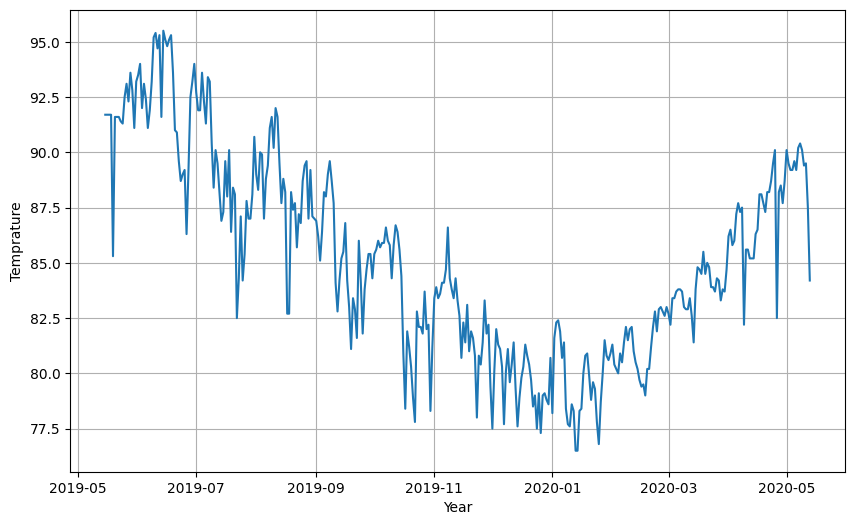

In [28]:
#the recent year
plt.figure(figsize=(10, 6))
plot_series(time[-365:], series[-365:])

In [29]:
#split data 
split_time = 8000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [30]:
#convert numpy array to tensor
series1 = tf.expand_dims(series, axis=-1)
ds = tf.data.Dataset.from_tensor_slices(series1[:20])
for val in ds:
    print(val.numpy())

[72.4]
[73.5]
[72.6]
[75.2]
[74.8]
[76.4]
[78.4]
[78.6]
[78.1]
[79.3]
[77.9]
[79.]
[73.4]
[76.7]
[73.7]
[77.]
[71.1]
[72.6]
[76.1]
[75.7]


In [31]:
#group 5 observation into 1
dataset = ds.window(5, shift=1)
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end=" ")
    print()

[72.4] [73.5] [72.6] [75.2] [74.8] 
[73.5] [72.6] [75.2] [74.8] [76.4] 
[72.6] [75.2] [74.8] [76.4] [78.4] 
[75.2] [74.8] [76.4] [78.4] [78.6] 
[74.8] [76.4] [78.4] [78.6] [78.1] 
[76.4] [78.4] [78.6] [78.1] [79.3] 
[78.4] [78.6] [78.1] [79.3] [77.9] 
[78.6] [78.1] [79.3] [77.9] [79.] 
[78.1] [79.3] [77.9] [79.] [73.4] 
[79.3] [77.9] [79.] [73.4] [76.7] 
[77.9] [79.] [73.4] [76.7] [73.7] 
[79.] [73.4] [76.7] [73.7] [77.] 
[73.4] [76.7] [73.7] [77.] [71.1] 
[76.7] [73.7] [77.] [71.1] [72.6] 
[73.7] [77.] [71.1] [72.6] [76.1] 
[77.] [71.1] [72.6] [76.1] [75.7] 
[71.1] [72.6] [76.1] [75.7] 
[72.6] [76.1] [75.7] 
[76.1] [75.7] 
[75.7] 


In [32]:
#drop variables with no grouping dataset = ds.window(5, shift=1, drop_remainder=True)
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end=" ")
    print()

[72.4] [73.5] [72.6] [75.2] [74.8] 
[73.5] [72.6] [75.2] [74.8] [76.4] 
[72.6] [75.2] [74.8] [76.4] [78.4] 
[75.2] [74.8] [76.4] [78.4] [78.6] 
[74.8] [76.4] [78.4] [78.6] [78.1] 
[76.4] [78.4] [78.6] [78.1] [79.3] 
[78.4] [78.6] [78.1] [79.3] [77.9] 
[78.6] [78.1] [79.3] [77.9] [79.] 
[78.1] [79.3] [77.9] [79.] [73.4] 
[79.3] [77.9] [79.] [73.4] [76.7] 
[77.9] [79.] [73.4] [76.7] [73.7] 
[79.] [73.4] [76.7] [73.7] [77.] 
[73.4] [76.7] [73.7] [77.] [71.1] 
[76.7] [73.7] [77.] [71.1] [72.6] 
[73.7] [77.] [71.1] [72.6] [76.1] 
[77.] [71.1] [72.6] [76.1] [75.7] 
[71.1] [72.6] [76.1] [75.7] 
[72.6] [76.1] [75.7] 
[76.1] [75.7] 
[75.7] 


In [33]:
#group 5 observation into 1 tensor varaible
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
for window in dataset:
    print(window.numpy())

[[72.4]
 [73.5]
 [72.6]
 [75.2]
 [74.8]]
[[73.5]
 [72.6]
 [75.2]
 [74.8]
 [76.4]]
[[72.6]
 [75.2]
 [74.8]
 [76.4]
 [78.4]]
[[75.2]
 [74.8]
 [76.4]
 [78.4]
 [78.6]]
[[74.8]
 [76.4]
 [78.4]
 [78.6]
 [78.1]]
[[76.4]
 [78.4]
 [78.6]
 [78.1]
 [79.3]]
[[78.4]
 [78.6]
 [78.1]
 [79.3]
 [77.9]]
[[78.6]
 [78.1]
 [79.3]
 [77.9]
 [79. ]]
[[78.1]
 [79.3]
 [77.9]
 [79. ]
 [73.4]]
[[79.3]
 [77.9]
 [79. ]
 [73.4]
 [76.7]]
[[77.9]
 [79. ]
 [73.4]
 [76.7]
 [73.7]]
[[79. ]
 [73.4]
 [76.7]
 [73.7]
 [77. ]]
[[73.4]
 [76.7]
 [73.7]
 [77. ]
 [71.1]]
[[76.7]
 [73.7]
 [77. ]
 [71.1]
 [72.6]]
[[73.7]
 [77. ]
 [71.1]
 [72.6]
 [76.1]]
[[77. ]
 [71.1]
 [72.6]
 [76.1]
 [75.7]]


In [34]:
#split variables into X an y
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x,y in dataset:
    print(x.numpy(), y.numpy())

[[72.4]
 [73.5]
 [72.6]
 [75.2]] [[74.8]]
[[73.5]
 [72.6]
 [75.2]
 [74.8]] [[76.4]]
[[72.6]
 [75.2]
 [74.8]
 [76.4]] [[78.4]]
[[75.2]
 [74.8]
 [76.4]
 [78.4]] [[78.6]]
[[74.8]
 [76.4]
 [78.4]
 [78.6]] [[78.1]]
[[76.4]
 [78.4]
 [78.6]
 [78.1]] [[79.3]]
[[78.4]
 [78.6]
 [78.1]
 [79.3]] [[77.9]]
[[78.6]
 [78.1]
 [79.3]
 [77.9]] [[79.]]
[[78.1]
 [79.3]
 [77.9]
 [79. ]] [[73.4]]
[[79.3]
 [77.9]
 [79. ]
 [73.4]] [[76.7]]
[[77.9]
 [79. ]
 [73.4]
 [76.7]] [[73.7]]
[[79. ]
 [73.4]
 [76.7]
 [73.7]] [[77.]]
[[73.4]
 [76.7]
 [73.7]
 [77. ]] [[71.1]]
[[76.7]
 [73.7]
 [77. ]
 [71.1]] [[72.6]]
[[73.7]
 [77. ]
 [71.1]
 [72.6]] [[76.1]]
[[77. ]
 [71.1]
 [72.6]
 [76.1]] [[75.7]]


In [35]:
#shuffle 
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
for x,y in dataset:
    print(x.numpy(), y.numpy())

[[78.1]
 [79.3]
 [77.9]
 [79. ]] [[73.4]]
[[74.8]
 [76.4]
 [78.4]
 [78.6]] [[78.1]]
[[77.9]
 [79. ]
 [73.4]
 [76.7]] [[73.7]]
[[72.4]
 [73.5]
 [72.6]
 [75.2]] [[74.8]]
[[76.4]
 [78.4]
 [78.6]
 [78.1]] [[79.3]]
[[73.5]
 [72.6]
 [75.2]
 [74.8]] [[76.4]]
[[79.3]
 [77.9]
 [79. ]
 [73.4]] [[76.7]]
[[78.4]
 [78.6]
 [78.1]
 [79.3]] [[77.9]]
[[77. ]
 [71.1]
 [72.6]
 [76.1]] [[75.7]]
[[78.6]
 [78.1]
 [79.3]
 [77.9]] [[79.]]
[[73.7]
 [77. ]
 [71.1]
 [72.6]] [[76.1]]
[[76.7]
 [73.7]
 [77. ]
 [71.1]] [[72.6]]
[[75.2]
 [74.8]
 [76.4]
 [78.4]] [[78.6]]
[[72.6]
 [75.2]
 [74.8]
 [76.4]] [[78.4]]
[[79. ]
 [73.4]
 [76.7]
 [73.7]] [[77.]]
[[73.4]
 [76.7]
 [73.7]
 [77. ]] [[71.1]]


In [36]:
#group into mini batches
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
for x,y in dataset:
    print("x = ", x.numpy())
    print("y = ", y.numpy())
    print("*"*25)

x =  [[[78.6]
  [78.1]
  [79.3]
  [77.9]]

 [[76.4]
  [78.4]
  [78.6]
  [78.1]]]
y =  [[[79. ]]

 [[79.3]]]
*************************
x =  [[[78.4]
  [78.6]
  [78.1]
  [79.3]]

 [[73.4]
  [76.7]
  [73.7]
  [77. ]]]
y =  [[[77.9]]

 [[71.1]]]
*************************
x =  [[[76.7]
  [73.7]
  [77. ]
  [71.1]]

 [[75.2]
  [74.8]
  [76.4]
  [78.4]]]
y =  [[[72.6]]

 [[78.6]]]
*************************
x =  [[[77. ]
  [71.1]
  [72.6]
  [76.1]]

 [[72.6]
  [75.2]
  [74.8]
  [76.4]]]
y =  [[[75.7]]

 [[78.4]]]
*************************
x =  [[[73.5]
  [72.6]
  [75.2]
  [74.8]]

 [[74.8]
  [76.4]
  [78.4]
  [78.6]]]
y =  [[[76.4]]

 [[78.1]]]
*************************
x =  [[[72.4]
  [73.5]
  [72.6]
  [75.2]]

 [[79.3]
  [77.9]
  [79. ]
  [73.4]]]
y =  [[[74.8]]

 [[76.7]]]
*************************
x =  [[[79. ]
  [73.4]
  [76.7]
  [73.7]]

 [[78.1]
  [79.3]
  [77.9]
  [79. ]]]
y =  [[[77. ]]

 [[73.4]]]
*************************
x =  [[[73.7]
  [77. ]
  [71.1]
  [72.6]]

 [[77.9]
  [79. ]
 

In [37]:
window_size = 60
batch_size = 32
shuffle_buffer_size = 1000

In [38]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """
    To create a window dataset given a numpy as input
    
    Returns: A prefetched tensorflow dataset
    """
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [59]:
 #build the model
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(learning_rate=1e-7, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

Epoch 1/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 63.5910 - mae: 64.0900
Epoch 2/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 9.3901 - mae: 9.8696
Epoch 3/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 8.4977 - mae: 8.9758
Epoch 4/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 8.0776 - mae: 8.5555
Epoch 5/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 7.7659 - mae: 8.2431
Epoch 6/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - loss: 7.5208 - mae: 7.9980
Epoch 7/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 7.2976 - mae: 7.7747
Epoch 8/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 7.0790 - mae: 7.5558
Epoch 9/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 6.8977 - mae: 7.3744
Epoch 10/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 6.7077 - mae: 7.1843
Epoch 11/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 6.5388 - mae: 7.0154
Epoch 12/500
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 6.3790 - mae: 6.8549
Epoch 13/500
80/80 

(1e-08, 0.0001, 0.0, 60.0)

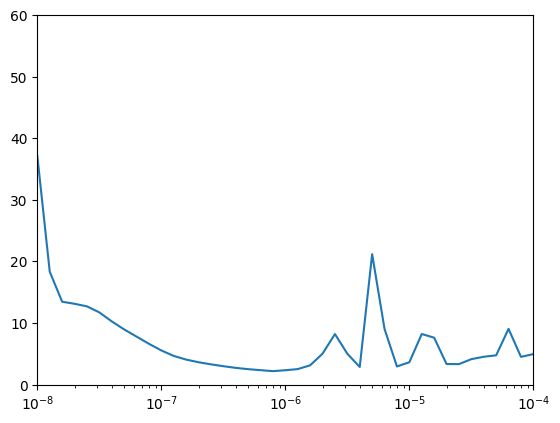

In [41]:
plt.semilogx(history.history["learning_rate"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [42]:
def model_forecast(model, series, window_size):
    """
    Given a model object and a series for it to predict, this function will return the prediction
    """
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [43]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

288/288 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


ValueError: x and y must have same first dimension, but have shapes (1202,) and (9203, 1)

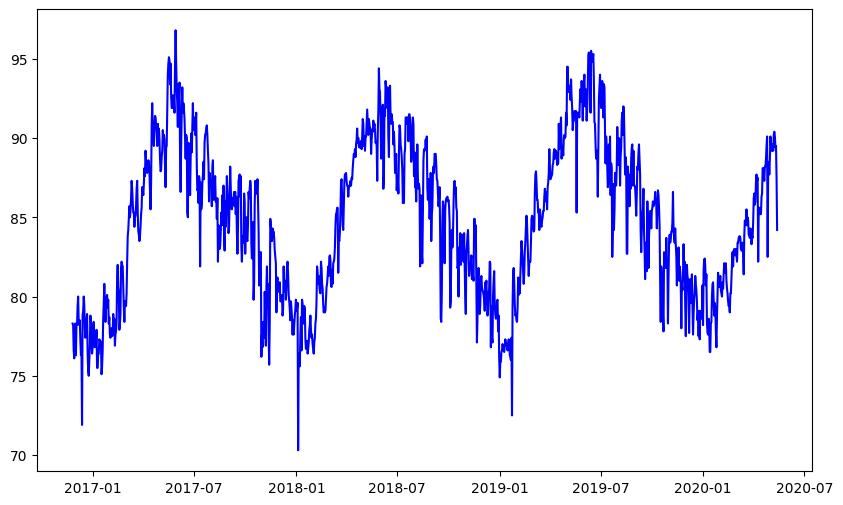

In [57]:

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)




In [55]:


# Function to plot series
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)


# Forecasting
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

# Plotting
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid[window_size:], rnn_forecast)
plt.show()


288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
#mae
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()


ValueError: x and y must have same first dimension, but have shapes (300,) and (0,)

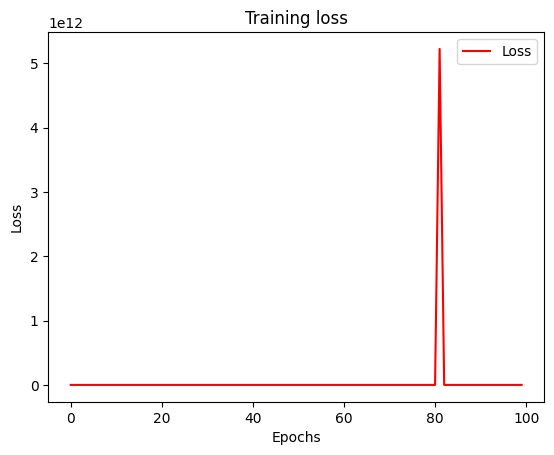

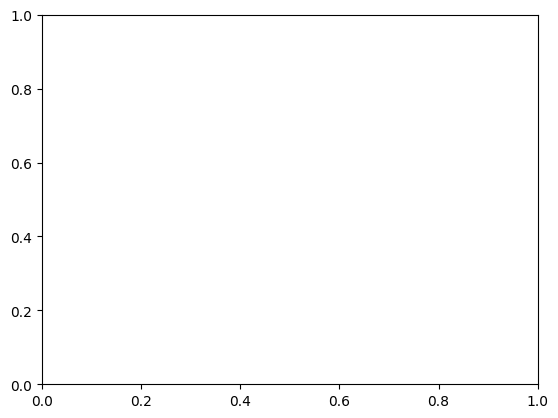

In [45]:
#loss
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()